In [37]:
pip install missingno MissForest

Defaulting to user installation because normal site-packages is not writeable
  Using cached MissForest-4.2.3-py3-none-any.whl (14 kB)

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [64]:
# Importar librerias
import os
import requests
import pandas as pd
import requests
import missingno as msno
from sklearn.model_selection import train_test_split
from missforest import MissForest

ModuleNotFoundError: No module named 'lightgbm'

## Visualizar csv

In [ ]:
df = pd.read_csv("/workspaces/steven10015-intro-ml/data/raw/airbnb.csv")
# Fijar el id como indice
df.set_index('id', inplace=True)
pd.set_option('display.max_columns', None)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Visualizar tamaño previo a la limpieza 
df.shape

(48895, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

In [ ]:
df.nunique()

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## Limpieza del csv

In [ ]:
# Visualizar si hay columnas con un valor unico multiplicado
unicos = df.nunique()
df[unicos[unicos==1].index]
# df.drop(unicos[unicos==1].index, axis=1, inplace=True), se omite, al no haber columnas de esas características.

""
id
2539
2595
3647
3831
5022
...
36484665
36485057
36485431


## Observar filas duplicadas, identicas

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Aqui con T invertimos el dataframe, para ver columnas duplicadas
df.T.duplicated().sum()

np.int64(0)

## Columnas redundantes

En algunas ocasiones habrán grupos de columnas muy específicas, las cuales podemos borrar ya que se pueden deducir sus datos a partir de las otras. Ejemplo: Casa_este, Casas_oeste, Casas_norte, Casas_sur; puedes borrar alguna sin problema y así reducir el peso del dataset.

In [ ]:
host_name_por_id = df.groupby('host_id')['host_name'].nunique()
print("host_id con >1 host_name:", (host_name_por_id > 1).sum())

host_id con >1 host_name: 0


En la segunda linea de código se ve si se cumple la condición de que un host id tenga mas de un host name.

In [ ]:
df.groupby('host_id')['host_name'].nunique() #Visualiza

host_id
2438         1
2571         1
2787         1
2845         1
2868         1
            ..
274273284    1
274298453    1
274307600    1
274311461    1
274321313    1
Name: host_name, Length: 37457, dtype: int64

In [ ]:
df.drop(columns=["host_name"], inplace = True)

In [ ]:
name_por_id = df.groupby('id')['name'].nunique()
print("id con >1 name:", (name_por_id > 1).sum())

id con >1 name: 0


In [ ]:
df.drop(columns=['name'], inplace=True)

Vemos el df con columnas de host_name y name elimandas

In [ ]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df['host_id'].value_counts()# Cantidad de filas con un mismo host_id

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
32045          1
7355           1
45445          1
24680832       1
274035866      1
Name: count, Length: 37457, dtype: int64

In [ ]:
# lo que va antes de map es reemplazado por lo que va despues.
df['host_pro'] = df['host_id'].map(df['host_id'].value_counts()).apply(lambda x: 1 if x >= 2 else 0)
# Guardar la columna
col = df.pop('host_pro')

# Insertarla en la posición 1 (justo después de host_id)
df.insert(1, 'host_pro', col)

df.head()

,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
2539,2787,1,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,0,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,0,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,0,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## No hay columnas data leakeage

neighborhood group hacer una
tipo de habitaciones con boxplot

Se considera data leakeage cuando una variable que tenemos presente (en forma de columna) es nuestro objetivo de investigación o consideramos que pueda interferir con este. Por ejemplo, el precio por metro cuadrado de una vivienda, si nuestro objetivo es predecir los precios.

## Visualizar columnas con datos faltantes

In [ ]:
col_datos_faltantes = df.isna().mean()*100
# [col_datos_faltantes > 0], esta parte del código genera booleanos, es una condición.
col_datos_faltantes[col_datos_faltantes>0] # Solo nos mostrará las columnas con na.

last_review          20.558339
reviews_per_month    20.558339
dtype: float64

No se observan una gran cantidad de datos faltantes, menor al 25% podría considerar aceptable.

## Visualizar cuantas filas tienen datos faltantes

In [ ]:
fila_datos_faltantes = df.isna().any(axis=1).sum() # any sirve para ver CUALQUIER dato faltante
fila_datos_faltantes[fila_datos_faltantes>0] # primer tipo de código para ver estas condiciones

array([10052])

In [ ]:
n = 2 # segundo tipo de código, se probaron varios números, 2 fue el primero con na
df[df.isna().sum(axis=1) > n] # se los visualiza, su sintaxis es seleccionar valores/dividirlos por col.fila/condición para mostrarlos.

,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,


In [ ]:
df_2na = df[df.isna().sum(axis=1) > n] # se guarda para ver tamaño
df_2na.shape

(0, 14)

<Axes: >

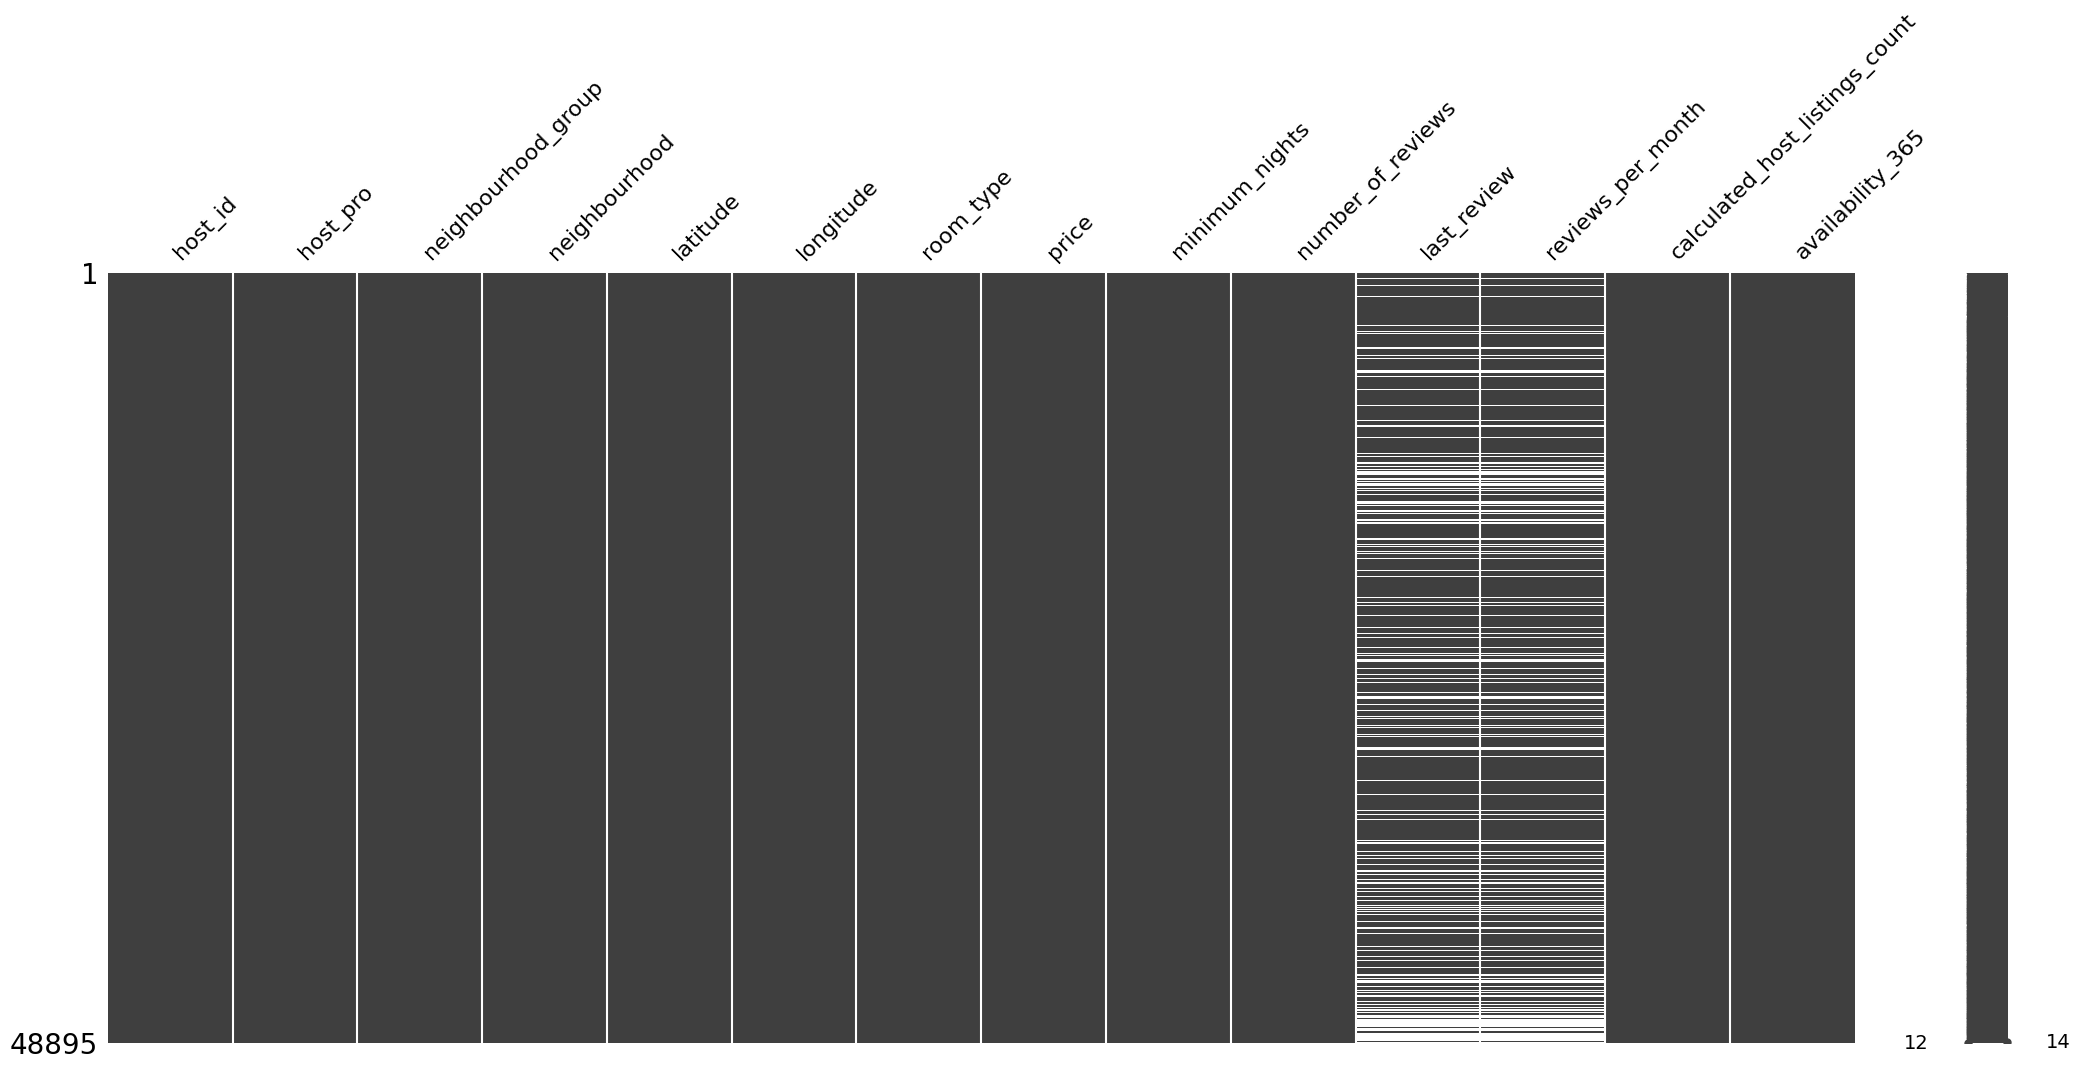

In [ ]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

Vemos que las columnas de última reseña y cantidad de reseñas por mes son las que carecen de más datos.

## Codificar variables categoricas

### Grupo de barrios

In [ ]:
# Se saca las medias para establecer un orden.
df.groupby("neighbourhood_group")["price"].mean().sort_values().reset_index()

,neighbourhood_group,price
0,Bronx,87.496792
1,Queens,99.517649
2,Staten Island,114.812332
3,Brooklyn,124.383207
4,Manhattan,196.875814


In [ ]:
#Creamos un df ordenando lor barrios por su precio medio
orden1=df.groupby("neighbourhood_group")["price"].mean().sort_values().reset_index()#Pasamos la serie a df
#Creamos un ranking de menor a mayor precio
orden1["cat"]=orden1["price"].rank().astype(int)
#Eliminamos el precio del nuevo df y establecemos indice para crear el diccionario objetivo
dicc1=orden1.drop(columns=["price"]).set_index("neighbourhood_group").to_dict()["cat"]
dicc1

{'Bronx': 1, 'Queens': 2, 'Staten Island': 3, 'Brooklyn': 4, 'Manhattan': 5}

In [ ]:
#Sutituimos los valores en el df
df["neighbourhood_group"]=df["neighbourhood_group"].replace(dicc1).astype("category")
df.head(2)

/tmp/ipykernel_2117/2812608512.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["neighbourhood_group"]=df["neighbourhood_group"].replace(dicc1).astype("category")


,host_id,host_pro,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
2539,2787,1,4,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,1,5,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


### Agrupar por barrios

##  Test de entrenamiento, división de datos

In [ ]:
X = df.drop('price',axis=1) #Separamos la variable objetivo/dependiente/explicada (y) de las independientes/explicativas (X)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Se usa semilla para tener el mismo resultado aleatorio cada vez.

## Imputar


In [ ]:
X_train["reviews_per_month"].value_counts(normalize=True)*100

reviews_per_month
0.02     2.376653
1.00     2.305708
0.05     2.183167
0.03     1.992906
0.16     1.760722
           ...   
10.15    0.003225
9.33     0.003225
8.16     0.003225
8.75     0.003225
12.12    0.003225
Name: proportion, Length: 902, dtype: float64

## Guardar el nuevo dataset filtrado